# Use of Sold Products Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import use_sold_products dataframe
use_sold_products=pd.read_csv('use_sold_products.csv')

In [2]:
use_sold_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                2253 non-null   object 
 1   account_id                  2253 non-null   int64  
 2   Year                        2253 non-null   int64  
 3   incorporated_country        2253 non-null   object 
 4   Primary activity            2253 non-null   object 
 5   Primary sector              2253 non-null   object 
 6   Market_Cap_USD              2013 non-null   float64
 7   Third_party_verification    2252 non-null   object 
 8   Revenue_USD                 2008 non-null   float64
 9   ebitda_USD                  2008 non-null   float64
 10  grossProfit_USD             2008 non-null   float64
 11  netIncome_USD               2008 non-null   float64
 12  cashAndCashEquivalents_USD  2008 non-null   float64
 13  shortTermInvestments_USD    2008 

In [3]:
use_sold_products.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,99000000.0,1.248000e+10,8.810000e+09,171000000.0,4.344000e+09,3.670000e+09,Use of sold products,3556030.00,380471.810000,4072324
1,AstraZeneca,1104,2018,United Kingdom,Pharmaceuticals,Biotech & pharma,7.441091e+10,Third-party verification or assurance process ...,2.209000e+10,7.165000e+09,...,113000000.0,6.065100e+10,4.660700e+10,922000000.0,1.911300e+10,1.404400e+10,Use of sold products,778885.00,707252.916667,4072324
2,Barratt Developments plc,23046,2018,United Kingdom,Residential building construction,Construction,6.017675e+09,Third-party verification or assurance process ...,6.049137e+09,1.152398e+09,...,240030000.0,9.353804e+09,3.170174e+09,240030000.0,1.699768e+09,6.183630e+09,Use of sold products,4703.27,24631.930000,4072324
3,BT Group,2377,2018,United Kingdom,Telecommunications services,"Media, telecommunications & data center services",2.997109e+10,Third-party verification or assurance process ...,2.975356e+10,9.392920e+09,...,128270000.0,5.878449e+10,4.587240e+10,128270000.0,2.143252e+10,1.291209e+10,Use of sold products,1250000.00,457281.895000,4072324
4,Burberry Group,2414,2018,United Kingdom,Clothing manufacture,Textiles & fabric goods,9.107209e+09,Third-party verification or assurance process ...,3.470656e+09,7.345680e+08,...,7366000.0,2.823210e+09,1.012952e+09,9398000.0,2.946400e+07,1.810258e+09,Use of sold products,32700.00,68188.250000,4072324


In [4]:
# Rename features
use_sold_products = use_sold_products.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
use_sold_products = use_sold_products.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

use_sold_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                2253 non-null   object 
 1   account_id                  2253 non-null   int64  
 2   Year                        2253 non-null   int64  
 3   Countries                   2253 non-null   object 
 4   Primary_activity            2253 non-null   object 
 5   Primary_sector              2253 non-null   object 
 6   Market_Cap_USD              2013 non-null   float64
 7   Revenue_USD                 2008 non-null   float64
 8   ebitda_USD                  2008 non-null   float64
 9   grossProfit_USD             2008 non-null   float64
 10  netIncome_USD               2008 non-null   float64
 11  cashAndCashEquivalents_USD  2008 non-null   float64
 12  shortTermInvestments_USD    2008 non-null   float64
 13  longTermInvestments_USD     2008 

In [5]:
# Looking at missing data
print(use_sold_products.isnull().mean().sort_values(ascending=False).round(3) * 100)

cashAndCashEquivalents_USD    10.9
totalLiabilities_USD          10.9
totalEquity_USD               10.9
totalDebt_USD                 10.9
Revenue_USD                   10.9
ebitda_USD                    10.9
grossProfit_USD               10.9
netIncome_USD                 10.9
totalInvestments_USD          10.9
shortTermInvestments_USD      10.9
longTermInvestments_USD       10.9
totalAssets_USD               10.9
Market_Cap_USD                10.7
scope_1_2_emissions_amount     0.2
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


### PCA Feature Engineering for Use of Sold Products

- **Selects numeric features** from the `use_sold_products` dataset, excluding ID, year, target, and categorical columns.
- **Applies signed log transformation** to stabilize feature distributions.
- **Drops rows with missing values** to ensure robust PCA input.
- **Standardizes the transformed numeric data** for optimal PCA computation.
- **Fits PCA** and generates principal component columns (`PC1`, `PC2`, ...) for valid rows.
- **Appends principal component features back** to the original dataframe, maintaining original row indices.
- **Plots explained variance and cumulative explained variance** for each principal component.
- **Prints cumulative variance explained** for each additional principal component.

_Result:_  
`use_sold_products_with_pcs` contains appended principal components for valid rows, ready for downstream modeling and analysis.

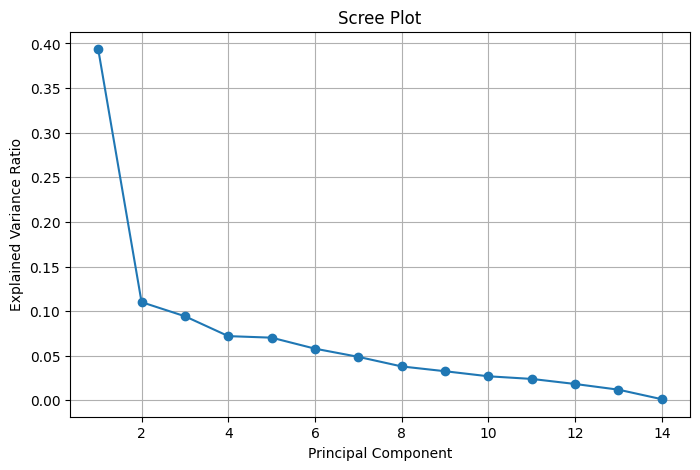

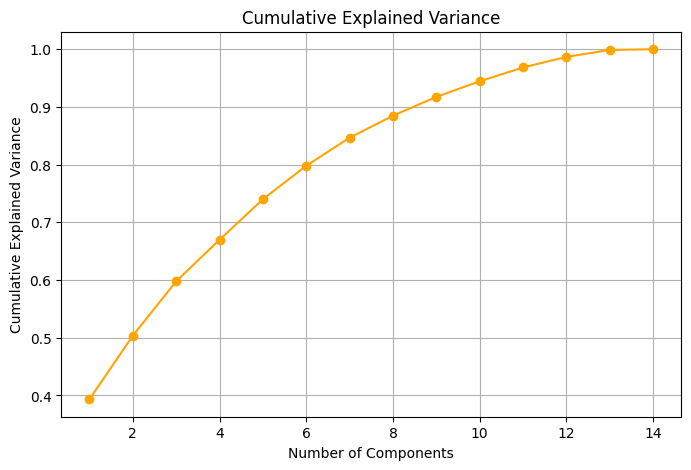

Cumulative variance explained by each additional principal component:
  PC1: 0.3935
  PC2: 0.5036
  PC3: 0.5978
  PC4: 0.6698
  PC5: 0.7401
  PC6: 0.7980
  PC7: 0.8467
  PC8: 0.8847
  PC9: 0.9174
  PC10: 0.9444
  PC11: 0.9684
  PC12: 0.9867
  PC13: 0.9987
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in use_sold_products.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(use_sold_products[col])
    and col != "Scope_3_emissions_amount"
]
X = use_sold_products[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
use_sold_products_with_pcs = use_sold_products.copy()
for col in pc_columns:
    use_sold_products_with_pcs[col] = np.nan  # initialize with NaN

use_sold_products_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# use_sold_products_with_pcs now contains the principal components for valid rows.

Nine pc's explains >90% of the variance in the data, seven pc's explains >80% of the variance and 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate 9 pc's, 7 pc's and 4 pc's performance on HLM models.

### Use of Sold Products: PCA Feature Engineering (9, 7, 4 PCs) and Train/Test Split

- Selects numeric features from the `use_sold_products` dataset, excluding IDs, categorical, and target columns.
- Applies signed log transformation for feature stabilization.
- Fits three PCA models:
  - **PC9:** 9 principal components (`PC9_*`)
  - **PC7:** 7 principal components (`PC7_*`)
  - **PC4:** 4 principal components (`PC4_*`)
- Appends PC features to the original dataframe, ordering them as PC9, then PC7, then PC4.
- Adds a signed log-transformed target variable.
- Splits the data into training (`Year` 2018–2022) and test (`Year` 2023) sets, keeping only companies present in training for the test set.

_Result:_  
`train_df` and `test_df` now include 9, 7, and 4 principal components for downstream modeling.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in use_sold_products.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(use_sold_products[col])
    and col != "Scope_3_emissions_amount"
]
X = use_sold_products[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = use_sold_products.loc[pca_data.index, "account_id"]
pca_data["Year"] = use_sold_products.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 9 components ---
pca9 = PCA(n_components=9)
pcs9 = pca9.fit_transform(X_scaled)
pcs9_df = pd.DataFrame(pcs9, columns=[f"PC9_{i+1}" for i in range(9)], index=pca_data.index)

# --- PCA for 7 components (PC7) ---
pca7 = PCA(n_components=7)
pcs7 = pca7.fit_transform(X_scaled)
pcs7_df = pd.DataFrame(pcs7, columns=[f"PC7_{i+1}" for i in range(7)], index=pca_data.index)

# --- PCA for 4 components ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame, with PC7 between PC9 and PC4 ---
use_sold_products_pca = use_sold_products.copy()
use_sold_products_pca = use_sold_products_pca.join(pcs9_df)
use_sold_products_pca = use_sold_products_pca.join(pcs7_df)
use_sold_products_pca = use_sold_products_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
use_sold_products_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(use_sold_products_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
use_sold_products_pca = use_sold_products_pca.rename(columns={'incorporated_country': 'Countries',
                                                         'Primary activity': 'Primary_activity',
                                                         'Primary sector': 'Primary_sector'})

# --- Split train/test by company and year ---
train_df = use_sold_products_pca[use_sold_products_pca['Year'].between(2018, 2022)].copy()
test_df  = use_sold_products_pca[use_sold_products_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1792, 43)
Test shape: (418, 43)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 1791
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   1792 non-null   object 
 1   account_id                     1792 non-null   int64  
 2   Year                           1792 non-null   int64  
 3   Countries                      1792 non-null   object 
 4   Primary_activity               1792 non-null   object 
 5   Primary_sector                 1792 non-null   object 
 6   Market_Cap_USD                 1601 non-null   float64
 7   Revenue_USD                    1607 non-null   float64
 8   ebitda_USD                     1607 non-null   float64
 9   grossProfit_USD                1607 non-null   float64
 10  netIncome_USD                  1607 non-null   float64
 11  cashAndCashEquivalents_USD     1607 non-null   float64
 12  shortTermInvestments_USD       1607 non-null   float6

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1792 to 2252
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   418 non-null    object 
 1   account_id                     418 non-null    int64  
 2   Year                           418 non-null    int64  
 3   Countries                      418 non-null    object 
 4   Primary_activity               418 non-null    object 
 5   Primary_sector                 418 non-null    object 
 6   Market_Cap_USD                 373 non-null    float64
 7   Revenue_USD                    363 non-null    float64
 8   ebitda_USD                     363 non-null    float64
 9   grossProfit_USD                363 non-null    float64
 10  netIncome_USD                  363 non-null    float64
 11  cashAndCashEquivalents_USD     363 non-null    float64
 12  shortTermInvestments_USD       363 non-null    floa

### Use of Sold Products: HLM Model with 9 Principal Components (Cleaned Categories)

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023) with appended PC9 features and signed log target.
- **Automatically drops rare categories** in `Countries` and `Primary_activity` (fewer than 3 samples) from both train and test.
- Model predictors: nine principal components (`PC9_1`–`PC9_9`), country, activity, and year.
- Ensures all categorical levels in test are present in training.
- Fits a mixed-effects model grouped by company (`account_id`), computes marginal and conditional R², and evaluates predictions with standard metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for summary tables.

_Result:_  
A hierarchical linear model using nine PC features for use of sold products, robust to singular matrix errors due to rare categorical levels.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 1568                  Method:                           ML                           
No. Groups:                       392                   Scale:                            0.5429                       
Min. group size:                  1                     Log-Likelihood:                   -2311.1072                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.0                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

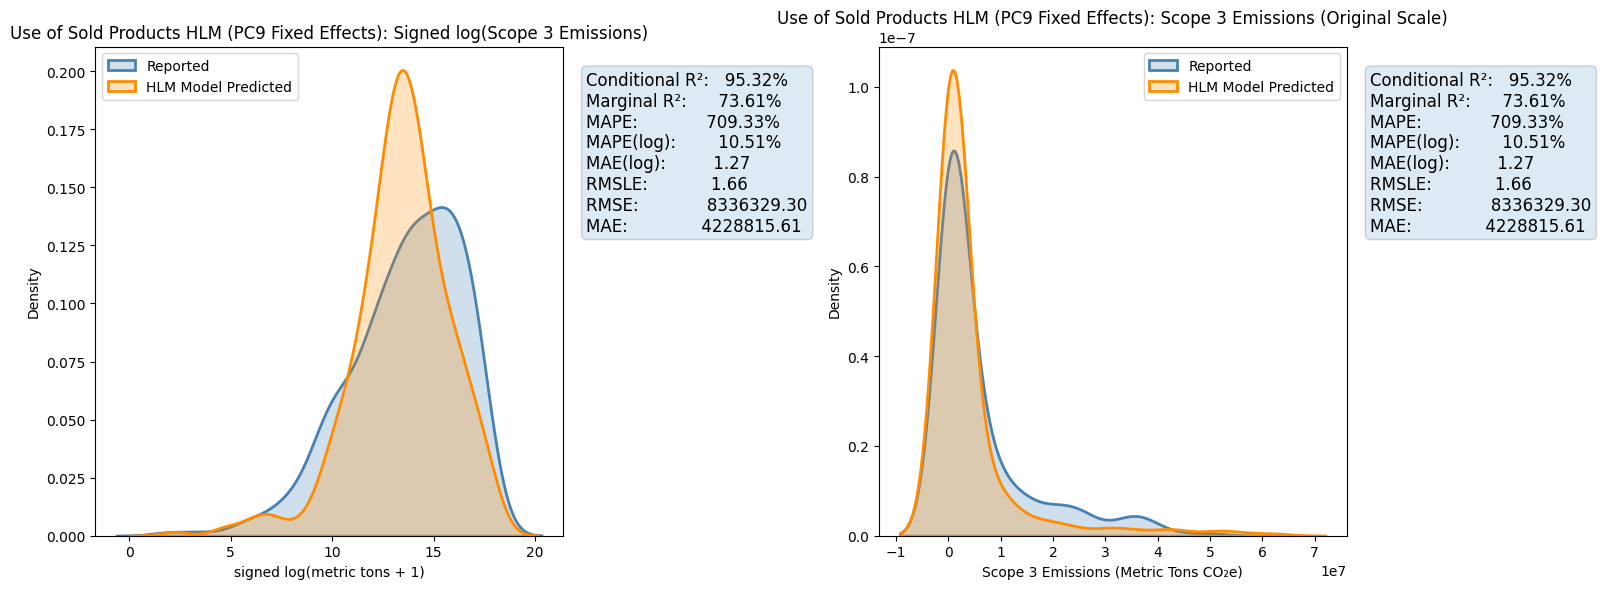

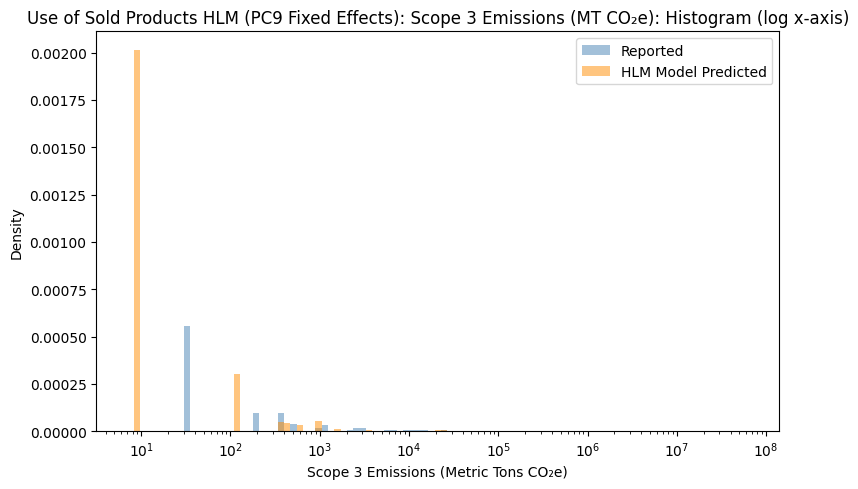

In [10]:
# --- Use of Sold Products HLM (PC9) using train_df and test_df, with rare category cleanup ---

feature_cols_PC9 = [f'PC9_{i}' for i in range(1, 10)]  # PC9_1 to PC9_9
target_col_PC9 = 'slog_Scope_3_emissions_amount'
cat_cols_PC9 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC9 = feature_cols_PC9 + [target_col_PC9] + cat_cols_PC9
train_df_PC9 = train_df.dropna(subset=all_model_vars_PC9).copy()
test_df_PC9 = test_df.dropna(subset=all_model_vars_PC9).copy()

# --- Drop rare categories (less than 3 samples in train) ---
for cat in ['Countries', 'Primary_activity']:
    counts = train_df_PC9[cat].value_counts()
    rare_cats = counts[counts < 3].index
    train_df_PC9 = train_df_PC9[~train_df_PC9[cat].isin(rare_cats)]
    test_df_PC9 = test_df_PC9[~test_df_PC9[cat].isin(rare_cats)]

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC9[cat_col].unique())
    n_before = len(test_df_PC9)
    test_df_PC9 = test_df_PC9[test_df_PC9[cat_col].isin(train_cats)]
    n_after = len(test_df_PC9)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC9.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC9) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC9} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    import statsmodels.formula.api as smf
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC9, groups=train_df_PC9['account_id'])
        mdf_PC9 = md.fit(reml=False, method='lbfgs')
    print(mdf_PC9.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_PC9.fittedvalues)
    var_resid = mdf_PC9.scale
    var_random = mdf_PC9.cov_re.iloc[0, 0] if mdf_PC9.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_PC9['predicted_log'] = mdf_PC9.predict(test_df_PC9)
    test_df_PC9['predicted'] = np.sign(test_df_PC9['predicted_log']) * (np.expm1(np.abs(test_df_PC9['predicted_log'])))

    # --- Metrics ---
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
    y_true_log = test_df_PC9[target_col_PC9]
    y_pred_log = test_df_PC9['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC9['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nUse of Sold Products HLM with PC9 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC9.params,
        'pvalue': mdf_PC9.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Use of Sold Products HLM (PC9 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Use of Sold Products HLM (PC9 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Use of Sold Products HLM (PC9 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Return metrics for summary table ---
    PC9_model_metrics = {
        "Model": "HLM PC9",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC9),
        "# Obs (test)": len(test_df_PC9),
        "# Obs (train/test)": f"{len(train_df_PC9)}/{len(test_df_PC9)}"
    }

### Use of Sold Products: HLM Model with 7 Principal Components

- Uses `train_df` (years 2018–2022) and `test_df` (year 2023) with appended PC7 features and signed log target.
- Model predictors: seven principal components (`PC7_1`–`PC7_7`), country, activity, and year.
- Drops rare categories in `Countries` and `Primary_activity` (fewer than 3 samples) from both train and test.
- Ensures all categorical levels in test are present in training.
- Fits a mixed-effects model grouped by company (`account_id`), computes marginal and conditional R², and evaluates predictions with standard metrics (MAPE, MAE, RMSE, RMSLE, etc.).
- Visualizes prediction results and feature coefficients.
- Returns metrics for summary tables.

_Result:_  
A hierarchical linear model using seven PC features for use of sold products, robust to singular matrix errors due to rare categorical levels.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 1568                  Method:                           ML                           
No. Groups:                       392                   Scale:                            0.5449                       
Min. group size:                  1                     Log-Likelihood:                   -2319.0954                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.0                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

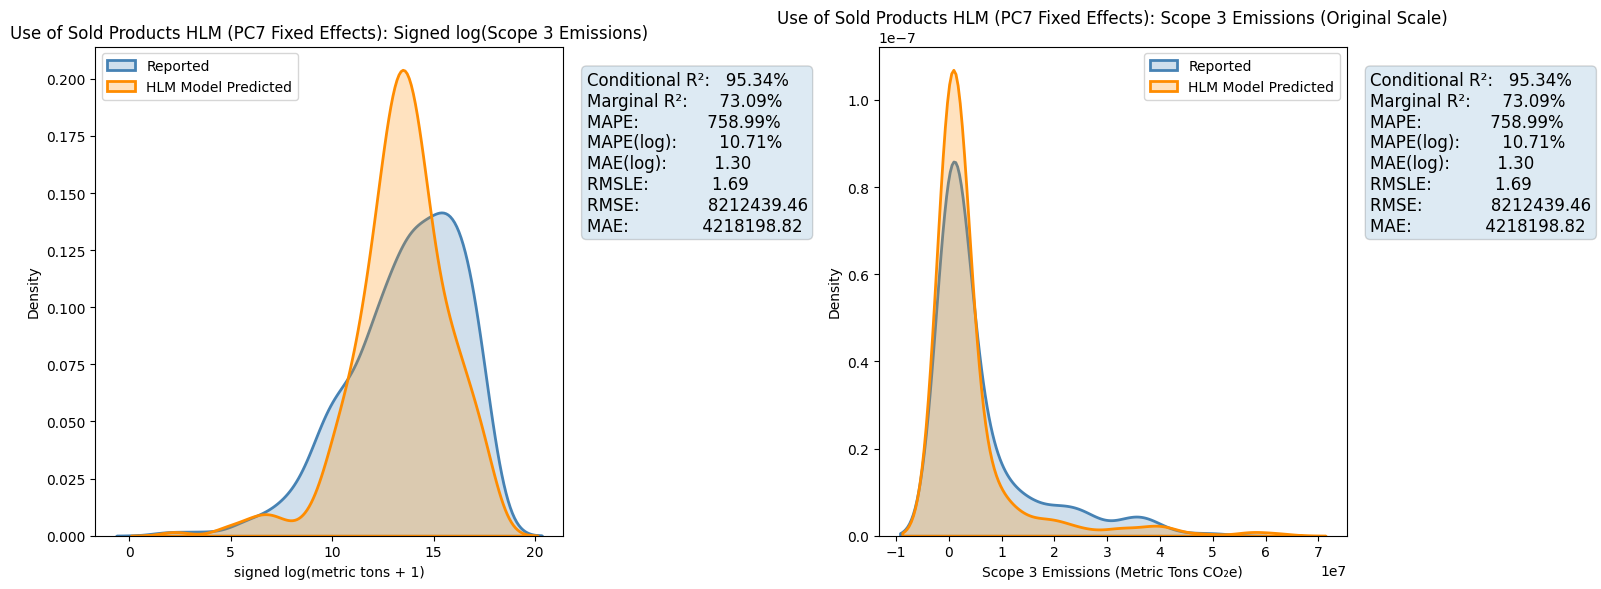

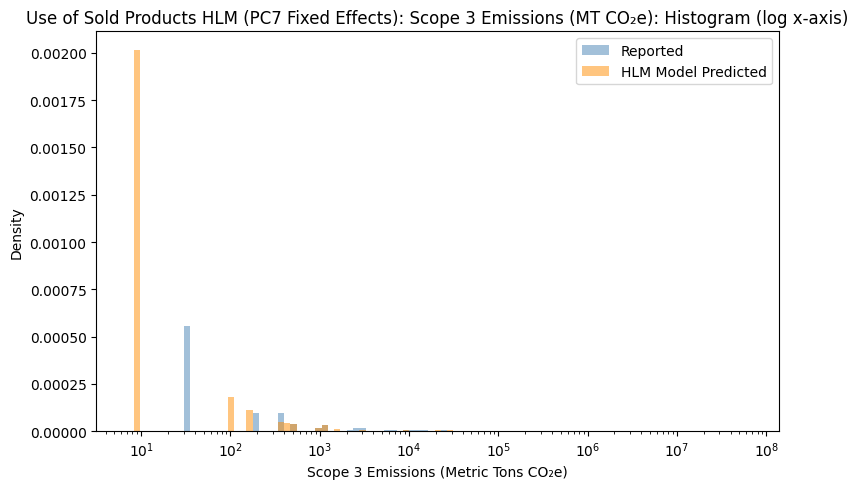

In [11]:
# --- Use of Sold Products HLM (PC7) using train_df and test_df ---

feature_cols_PC7 = [f'PC7_{i}' for i in range(1, 8)]  # PC7_1 to PC7_7
target_col_PC7 = 'slog_Scope_3_emissions_amount'
cat_cols_PC7 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC7 = feature_cols_PC7 + [target_col_PC7] + cat_cols_PC7
train_df_PC7 = train_df.dropna(subset=all_model_vars_PC7).copy()
test_df_PC7 = test_df.dropna(subset=all_model_vars_PC7).copy()

# --- Drop rare categories (less than 3 samples in train) ---
for cat in ['Countries', 'Primary_activity']:
    counts = train_df_PC7[cat].value_counts()
    rare_cats = counts[counts < 3].index
    train_df_PC7 = train_df_PC7[~train_df_PC7[cat].isin(rare_cats)]
    test_df_PC7 = test_df_PC7[~test_df_PC7[cat].isin(rare_cats)]

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC7[cat_col].unique())
    n_before = len(test_df_PC7)
    test_df_PC7 = test_df_PC7[test_df_PC7[cat_col].isin(train_cats)]
    n_after = len(test_df_PC7)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC7.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC7) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC7} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    import statsmodels.formula.api as smf
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC7, groups=train_df_PC7['account_id'])
        mdf_PC7 = md.fit(reml=False, method='lbfgs')
    print(mdf_PC7.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_PC7.fittedvalues)
    var_resid = mdf_PC7.scale
    var_random = mdf_PC7.cov_re.iloc[0, 0] if mdf_PC7.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_PC7['predicted_log'] = mdf_PC7.predict(test_df_PC7)
    test_df_PC7['predicted'] = np.sign(test_df_PC7['predicted_log']) * (np.expm1(np.abs(test_df_PC7['predicted_log'])))

    # --- Metrics ---
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
    y_true_log = test_df_PC7[target_col_PC7]
    y_pred_log = test_df_PC7['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC7['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nUse of Sold Products HLM with PC7 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC7.params,
        'pvalue': mdf_PC7.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Use of Sold Products HLM (PC7 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Use of Sold Products HLM (PC7 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Use of Sold Products HLM (PC7 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Return metrics for summary table ---
    PC7_model_metrics = {
        "Model": "HLM PC7",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC7),
        "# Obs (test)": len(test_df_PC7),
        "# Obs (train/test)": f"{len(train_df_PC7)}/{len(test_df_PC7)}"
    }

## Use of Sold Products HLM (PC4 Fixed Effects)

- **Purpose:** Predicts Scope 3 emissions for Use of Sold Products using four principal components (PC4_1–PC4_4) and key categorical variables.
- **Filtering:**
  - Drops rare categories (<3 samples) in `Countries` and `Primary_activity`.
  - Removes rows with missing data.
  - Ensures test set categorical levels match train set.
- **Model:** Mixed-effects linear model with fixed effects for PCs, country, activity, and year, plus a random effect for account.
- **Outputs:** R² (marginal/conditional), RMSE, MAE, RMSLE, MAPE, and visualizations for test predictions.

**Result:** Clean, robust prediction of emissions with careful category alignment.

                                         Mixed Linear Model Regression Results
Model:                            MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                 1568                  Method:                           ML                           
No. Groups:                       392                   Scale:                            0.5475                       
Min. group size:                  1                     Log-Likelihood:                   -2326.1691                   
Max. group size:                  5                     Converged:                        Yes                          
Mean group size:                  4.0                                                                                  
-----------------------------------------------------------------------------------------------------------------------
                                                                           Coef. 

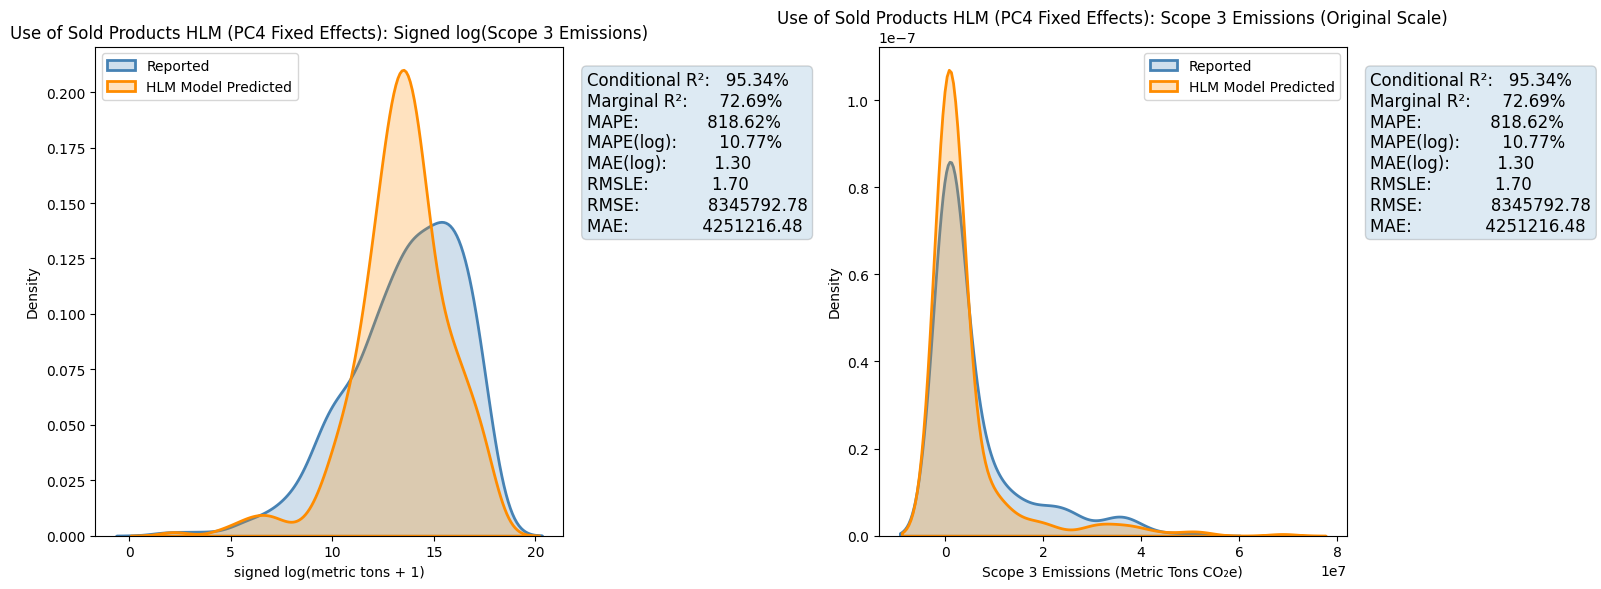

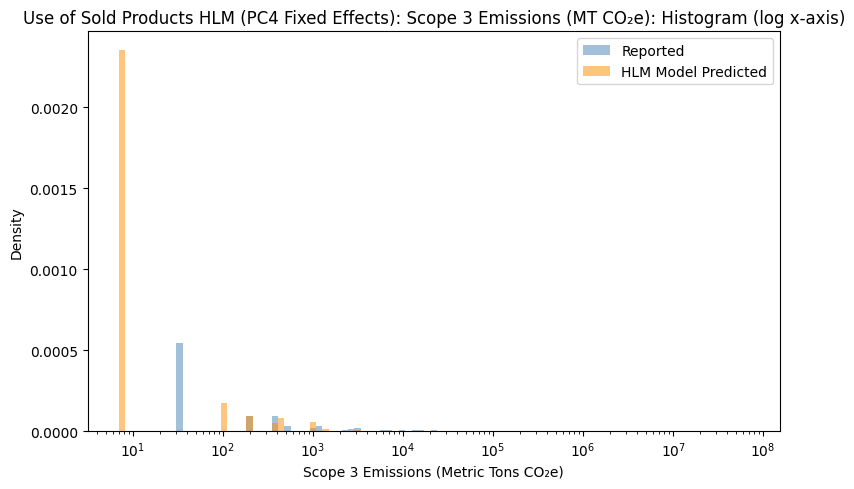

In [12]:
# --- Use of Sold Products HLM (PC4 Fixed Effects) with train_df and test_df, rare category cleanup ---

feature_cols_PC4 = [f'PC4_{i}' for i in range(1, 5)]  # PC4_1 to PC4_4
target_col_PC4 = 'slog_Scope_3_emissions_amount'
cat_cols_PC4 = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars_PC4 = feature_cols_PC4 + [target_col_PC4] + cat_cols_PC4
train_df_PC4 = train_df.dropna(subset=all_model_vars_PC4).copy()
test_df_PC4 = test_df.dropna(subset=all_model_vars_PC4).copy()

# --- Drop rare categories (less than 3 samples in train) ---
for cat in ['Countries', 'Primary_activity']:
    counts = train_df_PC4[cat].value_counts()
    rare_cats = counts[counts < 3].index
    train_df_PC4 = train_df_PC4[~train_df_PC4[cat].isin(rare_cats)]
    test_df_PC4 = test_df_PC4[~test_df_PC4[cat].isin(rare_cats)]

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC4[cat_col].unique())
    n_before = len(test_df_PC4)
    test_df_PC4 = test_df_PC4[test_df_PC4[cat_col].isin(train_cats)]
    n_after = len(test_df_PC4)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC4.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC4) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC4} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    import statsmodels.formula.api as smf
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC4, groups=train_df_PC4['account_id'])
        mdf_PC4 = md.fit(reml=False, method='lbfgs')
    print(mdf_PC4.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_PC4.fittedvalues)
    var_resid = mdf_PC4.scale
    var_random = mdf_PC4.cov_re.iloc[0, 0] if mdf_PC4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_PC4['predicted_log'] = mdf_PC4.predict(test_df_PC4)
    test_df_PC4['predicted'] = np.sign(test_df_PC4['predicted_log']) * (np.expm1(np.abs(test_df_PC4['predicted_log'])))

    # --- Metrics ---
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
    y_true_log = test_df_PC4[target_col_PC4]
    y_pred_log = test_df_PC4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nUse of Sold Products HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    import pandas as pd
    coef_df = pd.DataFrame({
        'coef': mdf_PC4.params,
        'pvalue': mdf_PC4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Use of Sold Products HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Use of Sold Products HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Use of Sold Products HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Return metrics for summary table ---
    pc4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC4),
        "# Obs (test)": len(test_df_PC4),
        "# Obs (train/test)": f"{len(train_df_PC4)}/{len(test_df_PC4)}"
    }

Now I'll look into hierarchical clustering on PC4 features to determine if that may add value to increasing prediction accuracy.

### Cluster Assignment on PC4 Features

- Performs hierarchical clustering (Ward linkage) on standardized PC4 principal components.
- Uses silhouette score to select the optimal number of clusters (2–30).
- Assigns optimal cluster labels to each row in the source data.
- **Appends the resulting `Cluster` column back to both `train_df` and `test_df` for future modeling.**
- Provides cluster membership for downstream analysis or model stratification.

Optimal number of clusters (highest silhouette score): 2


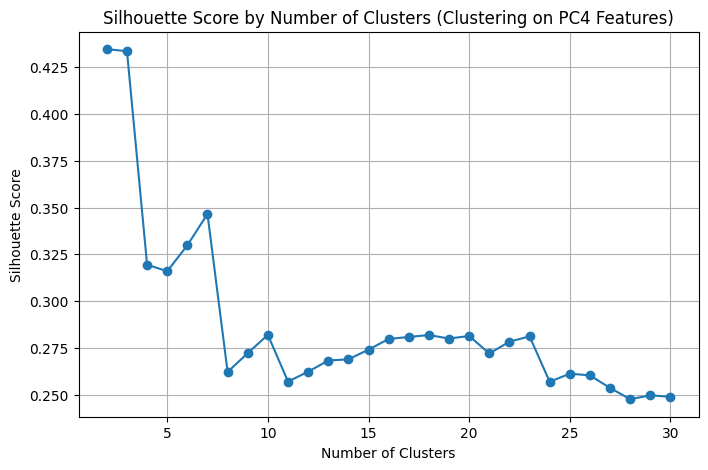

Number of observations in each cluster:
2    1812
1     180
Name: count, dtype: int64


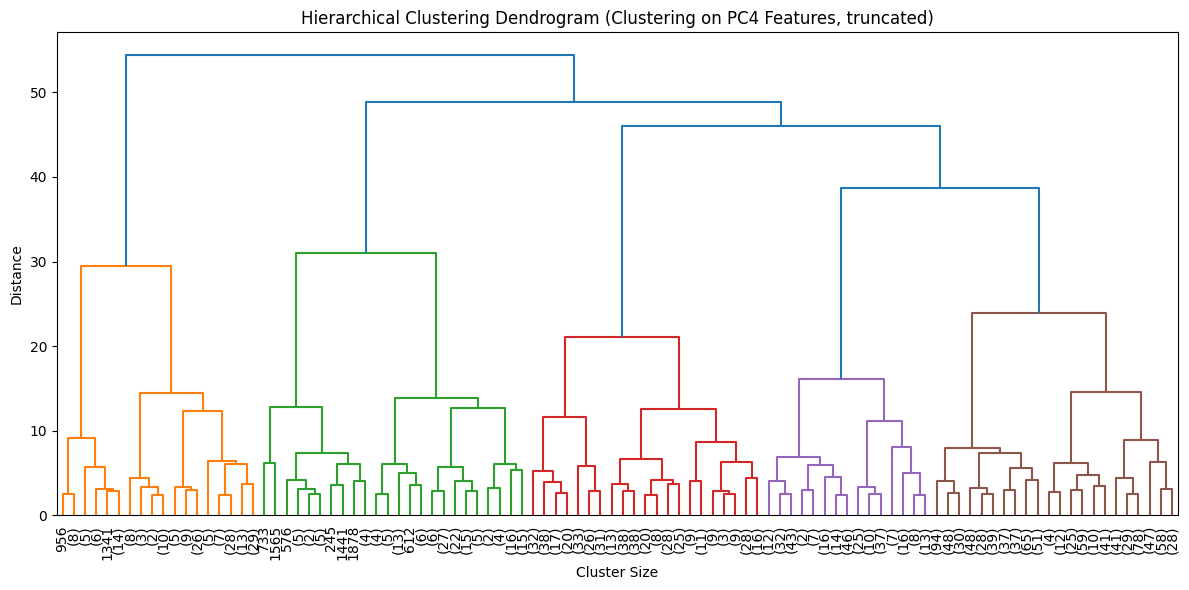

Train shape (with Cluster): (1792, 44)
Test shape (with Cluster): (418, 44)


In [13]:
# --- Clustering for Use of Sold Products (PC4 features, all data) ---

# STEP 1: Select PC4 PCA components for clustering (on all data)
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = use_sold_products_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# STEP 2: Standardize the PC4 data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# STEP 3: Hierarchical clustering (Ward linkage)
Z = linkage(X_scaled, method='ward')

# STEP 4: Find optimal number of clusters using silhouette score
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []
for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# STEP 5: Assign optimal cluster labels
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# STEP 6: Append cluster labels back to main DataFrame (only for valid rows)
use_sold_products_pca_clusters = use_sold_products_pca.copy()
use_sold_products_pca_clusters['Cluster'] = np.nan  # initialize with NaN
use_sold_products_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# Print cluster counts
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# Optionally plot dendrogram (subset for readability)
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# STEP 7: Update train/test splits with Cluster labels
train_df = train_df.copy()
test_df = test_df.copy()
train_df['Cluster'] = use_sold_products_pca_clusters.loc[train_df.index, 'Cluster']
test_df['Cluster'] = use_sold_products_pca_clusters.loc[test_df.index, 'Cluster']

print("Train shape (with Cluster):", train_df.shape)
print("Test shape (with Cluster):", test_df.shape)

In [14]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 1791
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   1792 non-null   object 
 1   account_id                     1792 non-null   int64  
 2   Year                           1792 non-null   int64  
 3   Countries                      1792 non-null   object 
 4   Primary_activity               1792 non-null   object 
 5   Primary_sector                 1792 non-null   object 
 6   Market_Cap_USD                 1601 non-null   float64
 7   Revenue_USD                    1607 non-null   float64
 8   ebitda_USD                     1607 non-null   float64
 9   grossProfit_USD                1607 non-null   float64
 10  netIncome_USD                  1607 non-null   float64
 11  cashAndCashEquivalents_USD     1607 non-null   float64
 12  shortTermInvestments_USD       1607 non-null   float6

### Use of Sold Products: Robust PC4 + Cluster HLM Model

- **Inputs:** Uses only the provided `train_df` and `test_df` datasets, which already contain appended PC4 features (`PC4_1`–`PC4_4`) and cluster assignments.
- **No Resplitting:** Data is not reshuffled or repartitioned; all modeling and filtering occur directly on the supplied train and test splits.
- **Rare Category Handling:** Drops categories (`Countries`, `Primary_activity`) with fewer than 3 samples from both train and test sets to ensure model stability and prevent singular matrix errors.
- **Cluster Data Type and Rare Cluster Merging:** Ensures the `Cluster` column is of `object` dtype before assigning string values. Clusters with fewer than 5 observations in the training set are merged into an `'Other'` category for both train and test to prevent overfitting and improve categorical robustness.
- **Missing Data and Category Alignment:** Drops rows with missing values for required model variables. After all filtering, ensures that all categorical levels (including clusters) present in the test set also exist in the training set, dropping any test rows with unseen categories to avoid prediction errors.
- **Year Centering:** Centers the `Year` variable using the mean from the training set for both train and test to improve model fit and interpretability.
- **Hierarchical Modeling:** Fits a hierarchical linear mixed-effects model (grouped by company/franchise `account_id`) using a robust optimizer. Model includes fixed effects for PC4 principal components, cluster assignment, country, primary activity, and centered year.
- **Metrics and Evaluation:** Computes marginal and conditional R², evaluates predictions on the test set using standard metrics (MAPE, MAE, RMSE, RMSLE, etc.), and visualizes results with KDE plots and robust histograms.
- **Output:** Returns a metrics dictionary summarizing model performance for inclusion in results tables.

**Result:**  
A robust hierarchical linear model for use of sold products, leveraging four principal components and cluster assignment, with careful handling of rare categories and data types for reliable, interpretable cluster-based modeling on future-year test data.

                                        Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               slog_Scope_3_emissions_amount
No. Observations:                1572                  Method:                           ML                           
No. Groups:                      396                   Scale:                            0.5474                       
Min. group size:                 1                     Log-Likelihood:                   -2332.3518                   
Max. group size:                 5                     Converged:                        Yes                          
Mean group size:                 4.0                                                                                  
----------------------------------------------------------------------------------------------------------------------
                                                                           Coef.  Std.Err

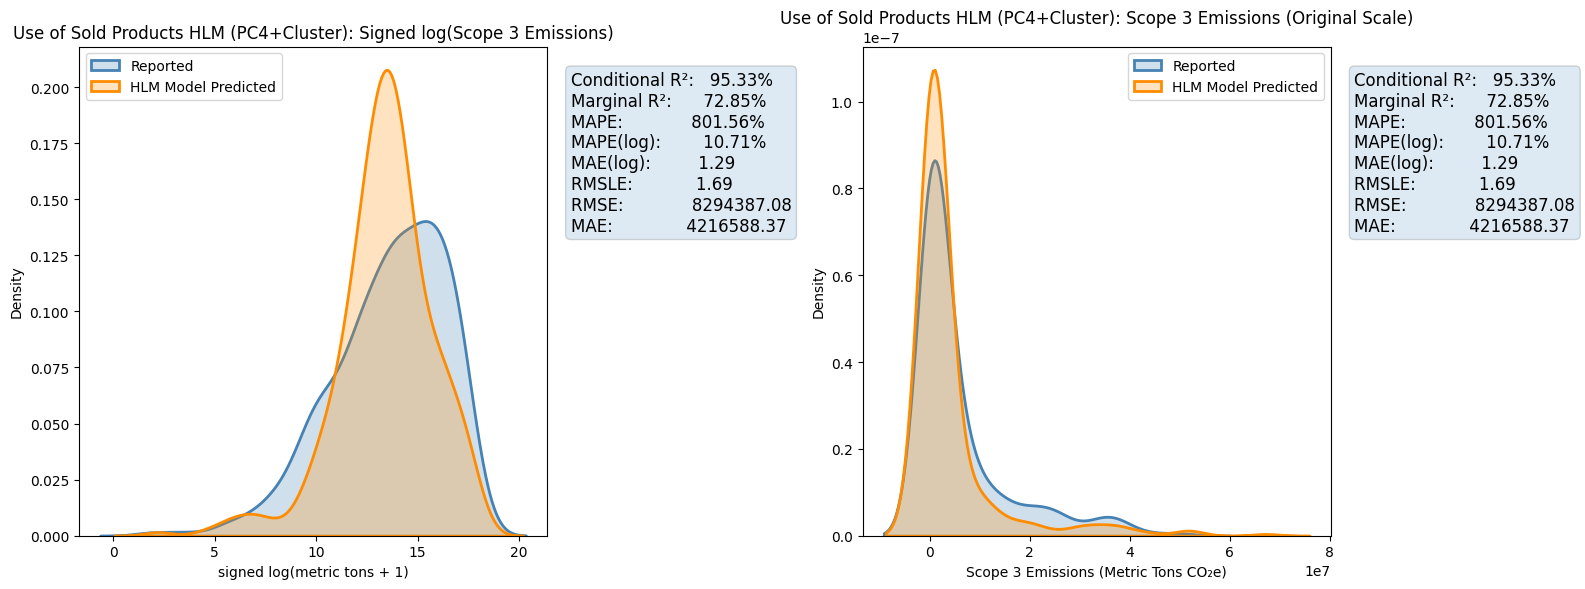

Histogram y_true min/max: 5.999999999999999 50962663.00000002
Histogram y_pred min/max: 8.132345517537095 67228250.506945


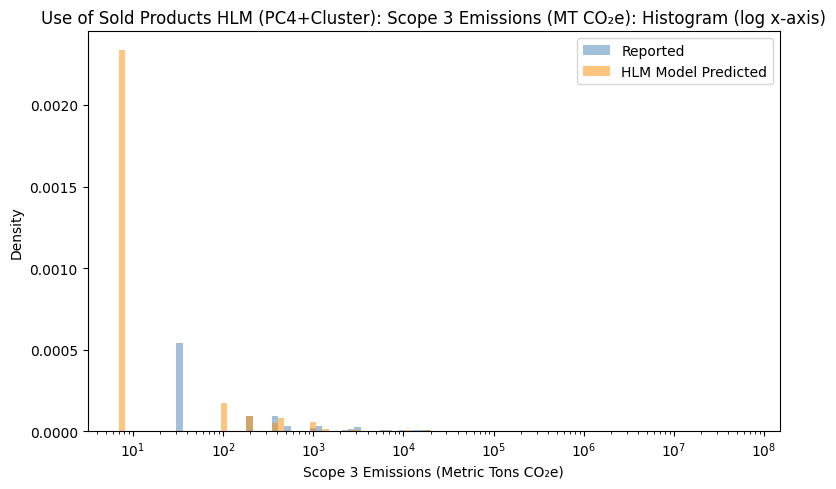

In [15]:
# --- Define model columns ---
feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_pc4_cluster + [target_col] + cat_cols

# --- Prepare Data ---
train_df_pc4 = train_df.copy()
test_df_pc4 = test_df.copy()

# --- Drop rare categories (less than 3 samples in train) from BOTH train and test ---
for cat in ['Countries', 'Primary_activity']:
    counts = train_df_pc4[cat].value_counts()
    rare_cats = counts[counts < 3].index
    train_df_pc4 = train_df_pc4[~train_df_pc4[cat].isin(rare_cats)]
    test_df_pc4 = test_df_pc4[~test_df_pc4[cat].isin(rare_cats)]

# --- Ensure Cluster column is object dtype for compatibility ---
train_df_pc4['Cluster'] = train_df_pc4['Cluster'].astype('object')
test_df_pc4['Cluster'] = test_df_pc4['Cluster'].astype('object')

# --- Merge rare clusters into 'Other' if they are too small ---
cluster_counts = train_df_pc4['Cluster'].value_counts()
rare_clusters = cluster_counts[cluster_counts < 5].index
train_df_pc4.loc[train_df_pc4['Cluster'].isin(rare_clusters), 'Cluster'] = 'Other'
test_df_pc4.loc[test_df_pc4['Cluster'].isin(rare_clusters), 'Cluster'] = 'Other'

# --- Drop missing values for modeling ---
train_df_pc4c = train_df_pc4.dropna(subset=all_model_vars).copy()
test_df_pc4c = test_df_pc4.dropna(subset=all_model_vars).copy()

# --- Final cleanup: drop any test rows with unseen categorical levels after all other filtering
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc4c[cat_col].unique())
    n_before = len(test_df_pc4c)
    test_df_pc4c = test_df_pc4c[test_df_pc4c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

# --- Center Year ---
if not train_df_pc4c.empty:
    year_mean = train_df_pc4c['Year'].mean()
    train_df_pc4c['Year_centered'] = train_df_pc4c['Year'] - year_mean
    test_df_pc4c['Year_centered'] = test_df_pc4c['Year'] - year_mean

if test_df_pc4c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster if col != 'Year']) +
        ' + C(Countries) + C(Primary_activity) + Year_centered'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- Fit the mixed-effects model with robust optimizer ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False, method="nm", maxiter=500, full_output=True)
    print(mdf_pc4c.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_pc4c.fittedvalues)
    var_resid = mdf_pc4c.scale
    var_random = mdf_pc4c.cov_re.iloc[0, 0] if mdf_pc4c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_pc4c['predicted_log'] = mdf_pc4c.predict(test_df_pc4c)
    test_df_pc4c['predicted'] = np.sign(test_df_pc4c['predicted_log']) * (np.expm1(np.abs(test_df_pc4c['predicted_log'])))

    # --- Metrics ---
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
    y_true_log = test_df_pc4c[target_col]
    y_pred_log = test_df_pc4c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nUse of Sold Products HLM with PC4+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    import pandas as pd
    coef_df = pd.DataFrame({
        'coef': mdf_pc4c.params,
        'pvalue': mdf_pc4c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Use of Sold Products HLM (PC4+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Use of Sold Products HLM (PC4+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()

    # --- Robust Histogram Plot ---
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > 0) & (y_pred > 0)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    print("Histogram y_true min/max:", y_true_hist.min() if len(y_true_hist)>0 else "empty", y_true_hist.max() if len(y_true_hist)>0 else "empty")
    print("Histogram y_pred min/max:", y_pred_hist.min() if len(y_pred_hist)>0 else "empty", y_pred_hist.max() if len(y_pred_hist)>0 else "empty")

    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if np.isfinite(min_val) and np.isfinite(max_val) and (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Use of Sold Products HLM (PC4+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # --- Metrics summary dictionary ---
    pc4_cluster_model_metrics = {
        "Model": "HLM PC4+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4c),
        "# Obs (test)": len(test_df_pc4c),
        "# Obs (train/test)": f"{len(train_df_pc4c)}/{len(test_df_pc4c)}"
    }

## Metrics Table

In [16]:
# --- Collect metrics dicts from each model; change names as needed ---
metrics_dicts = [
    PC9_model_metrics,         # "HLM PC9"
    PC7_model_metrics,         # "HLM PC7"
    pc4_model_metrics,         # "HLM PC4"
    pc4_cluster_model_metrics  # "HLM PC4+Cluster"
]

# --- Attach observation counts, convergence status, and explained variance to each dictionary ---
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts,
        [train_df_PC9, train_df_PC7, train_df_PC4, train_df_pc4c],
        [test_df_PC9, test_df_PC7, test_df_PC4, test_df_pc4c],
        [mdf_PC9, mdf_PC7, mdf_PC4, mdf_pc4c],
        [
            sum(pca9.explained_variance_ratio_),
            sum(pca7.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_),
            sum(pca4.explained_variance_ratio_)
        ]):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# --- Add a new row for your "Optimized" model ---
optimized_row = {
    "Model": "Optimized Use of Sold Products HLM",
    "Conditional_R2": 0.9529,   # as a fraction, not percent
    "Marginal_R2": 0.7396,
    "RMSE": 8860492.67,
    "MAE": 4481484.7,
    "MAE_log": 1.26,
    "RMSLE": 1.65,
    "MAPE": 759.72,
    "# Obs (train/test)": "1568/336",
    "PC Explained Variance": np.nan,
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# --- Order columns for summary ---
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2",
    "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

# Add MAE_log if missing
if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# --- Format for display ---
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(lambda v: "{:.2%}".format(v) if pd.notnull(v) else "")
        else:
            metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# --- Display in notebook or print ---
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC9,91.74%,95.32%,73.61%,8336329.30,4228815.61,1.27,1.66,709.33,1568/344,Yes
1,HLM PC7,84.67%,95.34%,73.09%,8212439.46,4218198.82,1.30,1.69,758.99,1568/344,Yes
2,HLM PC4,66.98%,95.34%,72.69%,8345792.78,4251216.48,1.30,1.70,818.62,1568/344,Yes
3,HLM PC4+Cluster,66.98%,95.33%,72.85%,8294387.08,4216588.37,1.29,1.69,801.56,1572/347,Yes
4,Optimized Use of Sold Products HLM,,95.29%,73.96%,8860492.67,4481484.70,1.26,1.65,759.72,1568/336,Yes
